## Spambase Dataset

### A team collected data on email messages to create a classifier that can separate spam from non-spam email messages. Short descriptions about the variables in the dataset are available from the following data archive: https://archive.ics.uci.edu/ml/datasets/spambase. Before running LDA, partition the data into training and validation sets by allocating 60percent of the observations to the training dataset and 40 percent of the observations to the validation dataset. 

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from dmba import classificationSummary
from dmba import gainsChart, liftChart
from sklearn.model_selection import train_test_split
import scikitplot as skplt

%matplotlib inline

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="terrain", rc=custom_params)

In [2]:
spambase_df = pd.read_csv('Spambase.csv')

In [3]:
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   W_3d        4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [4]:
spambase_df.rename(columns={'you ':'you'}, inplace=True)

In [5]:
spambase_df.describe()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
new_result_df = spambase_df['Spam'].copy()

In [7]:
new_result_df = new_result_df.map({1:'spam', 0:'non-spam'})

In [8]:
new_result_df.value_counts()

non-spam    2788
spam        1813
Name: Spam, dtype: int64

In [9]:
#spambase_df['Spam'] = pd.Categorical(spambase_df['Spam'])
#print(spambase_df['Spam'])

In [10]:
table = pd.pivot_table(spambase_df, index=['Spam'], aggfunc=np.mean)
table

,C!,C#,C$,C(,C;,CAP_avg,CAP_long,CAP_tot,C[,W_000,...,re:,receive,remove,report,table,technology,telnet,will,you,your
Spam,,,,,,,,,,,,,,,,,,,,,
0,0.109984,0.021713,0.011648,0.158578,0.050281,2.377301,18.214491,161.470947,0.022684,0.007088,...,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,0.513713,0.078877,0.174478,0.108970,0.020573,9.519165,104.393271,470.619415,0.008199,0.247055,...,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370


In [11]:
table1 = pd.DataFrame(table, columns=() + tuple(sorted(table)))
table1

,C!,C#,C$,C(,C;,CAP_avg,CAP_long,CAP_tot,C[,W_000,...,re:,receive,remove,report,table,technology,telnet,will,you,your
Spam,,,,,,,,,,,,,,,,,,,,,
0,0.109984,0.021713,0.011648,0.158578,0.050281,2.377301,18.214491,161.470947,0.022684,0.007088,...,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,0.513713,0.078877,0.174478,0.108970,0.020573,9.519165,104.393271,470.619415,0.008199,0.247055,...,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370


In [12]:
#For the spam class
table2 = table1.iloc[1][:]
table2

C!              0.513713
C#              0.078877
C$              0.174478
C(              0.108970
C;              0.020573
CAP_avg         9.519165
CAP_long      104.393271
CAP_tot       470.619415
C[              0.008199
W_000           0.247055
W_1999          0.043469
W_3d            0.164672
W_415           0.001776
W_650           0.018798
W_85            0.006928
W_857           0.000518
address         0.164650
addresses       0.112079
all             0.403795
business        0.287507
conference      0.002101
credit          0.205521
cs              0.000055
data            0.014562
direct          0.036718
edu             0.014727
email           0.319228
font            0.238036
free            0.518362
george          0.001550
hp              0.017479
hpl             0.009173
internet        0.208141
lab             0.000684
labs            0.005968
mail            0.350507
make            0.152339
meeting         0.002443
money           0.212879
order           0.170061


In [13]:
# for the non spam class
table3 = table1.iloc[0][:]
table3

C!              0.109984
C#              0.021713
C$              0.011648
C(              0.158578
C;              0.050281
CAP_avg         2.377301
CAP_long       18.214491
CAP_tot       161.470947
C[              0.022684
W_000           0.007088
W_1999          0.197744
W_3d            0.000886
W_415           0.077787
W_650           0.193806
W_85            0.169455
W_857           0.077306
address         0.244466
addresses       0.008318
all             0.200581
business        0.048346
conference      0.051227
credit          0.007579
cs              0.072027
data            0.150986
direct          0.083117
edu             0.287184
email           0.097292
font            0.045226
free            0.073587
george          1.265265
hp              0.895473
hpl             0.431994
internet        0.038415
lab             0.162794
labs            0.165854
mail            0.167170
make            0.073479
meeting         0.216808
money           0.017138
order           0.038049


### Qno. 1 Examine how each predictor differs between the spam and non-spam e-mails by comparing the spam-class average and non-spam-class average. Identify 10 predictors for which the difference between the spam-class average and the non-spam class average is the highest. 

    Ans:- 

In [14]:
diff = table2 - table3
diff.nlargest(n=10)

CAP_tot     309.148468
CAP_long     86.178780
CAP_avg       7.141864
you           0.994199
your          0.941668
free          0.444775
C!            0.403729
our           0.332915
remove        0.266022
W_000         0.239967
dtype: float64

### Qno. 2 Among those predictors, which words or signs appear more often in spam emails?

    Ans:- 

In [15]:
spam_df = spambase_df.copy()
col_names = list(spam_df.columns)
spam_percentage = {}
for col in col_names:
    spam_percentage[col] = (spam_df.groupby('Spam')[col].sum()[1] / (spam_df.groupby('Spam')[col].count()[1] * 100)) * 100

rem_keys = ['Spam', 'CAP_tot', 'CAP_long', 'CAP_avg']
[spam_percentage.pop(key) for key in rem_keys]

spam_percentage = sorted(spam_percentage.items(), key=lambda x: x[1], reverse=True)
spam_percentage

[('you', 2.2645394373965804),
 ('your', 1.3803695532266962),
 ('will ', 0.5499724214009929),
 ('free', 0.5183618312189741),
 ('our', 0.5139547710976282),
 ('C!', 0.5137126309983453),
 ('all', 0.40379481522338667),
 ('mail', 0.35050744622173197),
 ('email', 0.3192277992277992),
 ('business', 0.2875068946497518),
 ('remove', 0.27540540540540537),
 ('W_000', 0.2470546056260342),
 ('font', 0.23803640375068946),
 ('money', 0.21287920573634858),
 ('internet', 0.20814120242691672),
 ('credit', 0.20552123552123555),
 ('over', 0.17487589630446773),
 ('C$', 0.17447821290678434),
 ('order', 0.17006067291781576),
 ('W_3d', 0.1646718146718147),
 ('address', 0.16464975179260893),
 ('make', 0.15233866519580805),
 ('people', 0.14354660783232212),
 ('re:', 0.12509100937672366),
 ('receive', 0.11843353557639272),
 ('addresses', 0.11207942636514065),
 ('C(', 0.10897021511307224),
 ('report', 0.08357418643132929),
 ('C#', 0.078876999448428),
 ('W_1999', 0.04346938775510204),
 ('direct', 0.0367181467181467

In [16]:
predictor = ['CAP_tot', 'CAP_long', 'CAP_avg','you','your','free','C!','our','remove','W_000']
outcome = ['Spam']

### Qno. 3 Perform a linear discriminant analysis using the training dataset (60 percent of observations in the original dataset). Include only 10 predictors identified in the question above in the LDA model.

    Ans:- 

In [17]:
X = spambase_df[predictor]
y = spambase_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

### Qno. 4 What are the coefficients of linear discriminants? How are these coefficients used in your LDA analysis?

    Ans:- 11007758e-03 ,1.89050680e-04 ,5.63814654e-03 ,2.11533416e-01, 6.19354232e-01 
    ,6.34404359e-01 ,5.07991634e-01 ,6.24254115e-01 ,2.29760575e+00, and 2.27992373e+00. 
    Coefficients of linear discriminants shows the linear combination of predictor 
    variables that are used to form the LDA decision rule.

In [18]:
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(train_X, train_y)

print('Coefficients', lda_reg.coef_)
print('Intercept', lda_reg.intercept_)

Coefficients [[1.11007758e-03 1.89050680e-04 5.63814654e-03 2.11533416e-01
  6.19354232e-01 6.34404359e-01 5.07991634e-01 6.24254115e-01
  2.29760575e+00 2.27992373e+00]]
Intercept [-3.01534432]


C:\Users\janme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
result_df = X.copy()
#result_df['Spam'] = y
result_df.index = result_df.index + 1
result_df

,CAP_tot,CAP_long,CAP_avg,you,your,free,C!,our,remove,W_000
1,278,61,3.756,1.93,0.96,0.32,0.778,0.32,0.00,0.00
2,1028,101,5.114,3.47,1.59,0.14,0.372,0.14,0.21,0.43
3,2259,485,9.821,1.36,0.51,0.06,0.276,1.23,0.19,1.16
4,191,40,3.537,3.18,0.31,0.31,0.137,0.63,0.31,0.00
5,191,40,3.537,3.18,0.31,0.31,0.135,0.63,0.31,0.00
...,...,...,...,...,...,...,...,...,...,...
4597,88,3,1.142,0.62,0.00,0.00,0.000,0.00,0.00,0.00
4598,14,4,1.555,6.00,2.00,0.00,0.353,0.00,0.00,0.00
4599,118,6,1.404,1.50,0.30,0.00,0.000,0.00,0.00,0.00
4600,78,5,1.147,1.93,0.32,0.00,0.000,0.32,0.00,0.00


### Qno. 5 How many linear discriminants (functions) are in the model? Why?

    Ans:- There are a total of 4601 linear discriminant function in the model because 
    when we calculate lda function, for class 'k'(sigma is same for all k classes), 
    assigning the observation to class with maximum pk(x) with πk as the probability 
    of response variable belonging to kth class., which means that given an input x 
    we predict the class with the highest value of pk(x).

In [20]:
result_df['Dec. Function'] = lda_reg.decision_function(X)
result_df['Prediction'] = lda_reg.predict(X)
result_df['p(Owner)'] = lda_reg.predict_proba(X)[:, 1]

print(result_df)

      CAP_tot  CAP_long  CAP_avg   you  your  free     C!   our  remove  \
1         278        61    3.756  1.93  0.96  0.32  0.778  0.32    0.00   
2        1028       101    5.114  3.47  1.59  0.14  0.372  0.14    0.21   
3        2259       485    9.821  1.36  0.51  0.06  0.276  1.23    0.19   
4         191        40    3.537  3.18  0.31  0.31  0.137  0.63    0.31   
5         191        40    3.537  3.18  0.31  0.31  0.135  0.63    0.31   
...       ...       ...      ...   ...   ...   ...    ...   ...     ...   
4597       88         3    1.142  0.62  0.00  0.00  0.000  0.00    0.00   
4598       14         4    1.555  6.00  2.00  0.00  0.353  0.00    0.00   
4599      118         6    1.404  1.50  0.30  0.00  0.000  0.00    0.00   
4600       78         5    1.147  1.93  0.32  0.00  0.000  0.32    0.00   
4601       40         5    1.250  4.60  0.65  0.00  0.125  0.00    0.00   

      W_000  Dec. Function  Prediction  p(Owner)  
1      0.00      -0.873206           0  0.294588

In [21]:
result_df['Dec. Function'].count()

4601

### Qno. 6 Generate linear discriminants scores using your model. How are they used in classifying spams and non-spams?
    Ans:- Score for the LDA is 84.08%. If the Scores are postive then then our model tends 
    to classify our data to Class 1(Spam), otherwise if our are negative then it tends to 
    classify our data to Class 0(Non-spam) 

In [48]:
result = pd.DataFrame({'Classification': lda_reg.predict(valid_X),
                  'Actual': valid_y['Spam']})
result['Scores'] = lda_reg.decision_function(valid_X)
result['Propensity'] = lda_reg.predict_log_proba(valid_X)[:,1]

result

,Classification,Actual,Scores,Propensity
1351,0,1,-2.10,-2.22e+00
1687,0,1,-2.90,-2.95e+00
1297,1,1,2.35,-9.07e-02
2101,0,0,-1.74,-1.90e+00
3920,0,0,-2.56,-2.63e+00
...,...,...,...,...
4413,0,0,-2.69,-2.75e+00
583,1,1,2.25,-1.00e-01
1208,1,1,5.05,-6.38e-03
3128,0,0,-2.99,-3.04e+00


### Qno. 7 Generate confusion matrix using the validation data. Comment on the usefulness of the model based on the results from the confusion matrix.

    Ans:- From the below confusion matrix, we got a accuracy 84.08%. According to 60% 
    training data, our model is doing a good job and we have a high accuracy.

In [35]:
classificationSummary(valid_y['Spam'], 
                      lda_reg.predict(valid_X),
                      class_names=lda_reg.classes_)

Confusion Matrix (Accuracy 0.8408)

       Prediction
Actual    0    1
     0 1063   35
     1  258  485


In [59]:
y_pred1 = lda_reg.predict(valid_X)
y_pred1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

### Qno. 8 Generate lift and decile charts using the validation data. Comment on the usefulness of the model based on the results from these charts

    Ans:- From the below chart we can interpret that our model is well when classifying our data 
    points to spam class. But doing a poor job when classifying when compared to spam class. 
    In lift chart we can see we get maximum lift in in spam class but in non-spam class 
    it doesnot show a good lift and it decline slowly.

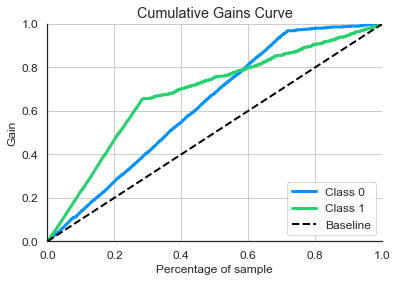

In [61]:
y_pred2 = pd.get_dummies(y_pred1)

skplt.metrics.plot_cumulative_gain(valid_y['Spam'], y_pred2)

plt.show()

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

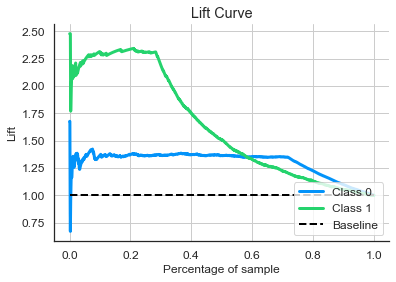

In [62]:
skplt.metrics.plot_lift_curve(valid_y['Spam'], y_pred2)

In [63]:
df = valid_y
df['prob'] = y_pred1.tolist()
df
df = df.sort_values(by=['prob'], ascending=False)

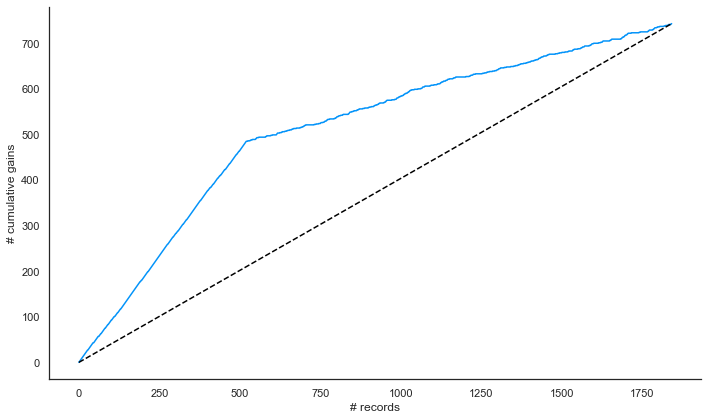

In [69]:
gainsChart(df.Spam, figsize=(10, 6))
plt.tight_layout()
plt.show()

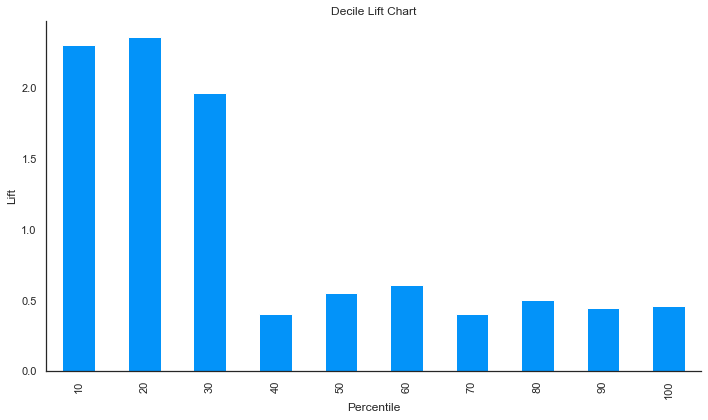

In [66]:
liftChart(df['Spam'], labelBars=False, figsize=(10,6))
plt.tight_layout()
plt.show()